---
# Cairo University Faculty of Engineering
## Machine Learning
## Assignment 7

---

Please write your full name here
- **Name** : Mohamed El-Sayed Eid

# Part 1 Clustering

In this part of the assignment, you will be exploring kmeans algorithms for clustering

--------------------

The k-means clustering is first given the wanted number of clusters, say k, as a hyperparameter. Next, to start the algorithm, k points from the data set are chosen randomly as cluster centres. Then the following phases are repeated iteratively:

- any data point is set to belong to a cluster, whose centre is closest to it
- then for each cluster a new centre is chosen as the average of the data points in the cluster
This procedure is repeated until the clusters no longer change. This kind of algorithm is called an Expectation-Maximization (EM) algorithm, which is known to converge.

In [163]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy
import random
%matplotlib inline

In [164]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)

## Question 0
Set random seed to 100

In [165]:
np.random.seed(100)

## Question 1
Scatter plot the dataset

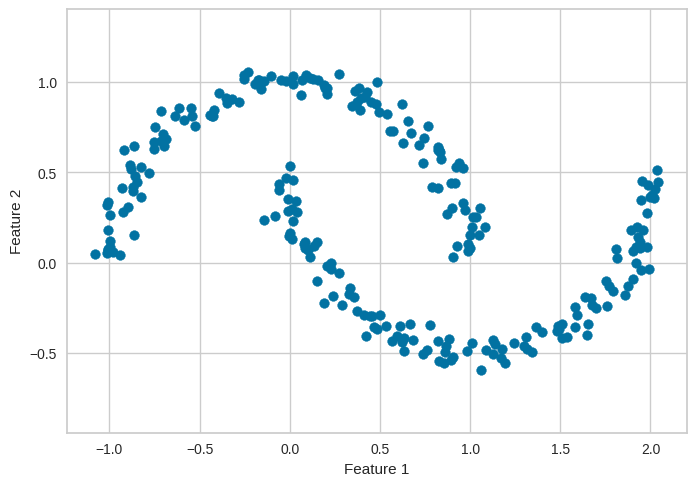

In [166]:
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2');

## Question 2
In your opinon, how well will K-Means perform on the above dataset? Explain.

**ANSWER:**

## Question 3
1. Use Elbow method to find best "k". (Use inertia as metric). Use a range of K from the 1 to 15
2. Plot the elbow graph.
3. Train SKlearn KMeans model using the **best k** you found.
4. Scatter plot the results and **color** the clusters

**NOTE**

If you get a memory leak warning, please follow the following link: https://stackoverflow.com/questions/69596239/how-to-avoid-memory-leak-when-dealing-with-kmeans-for-example-in-this-code-i-am

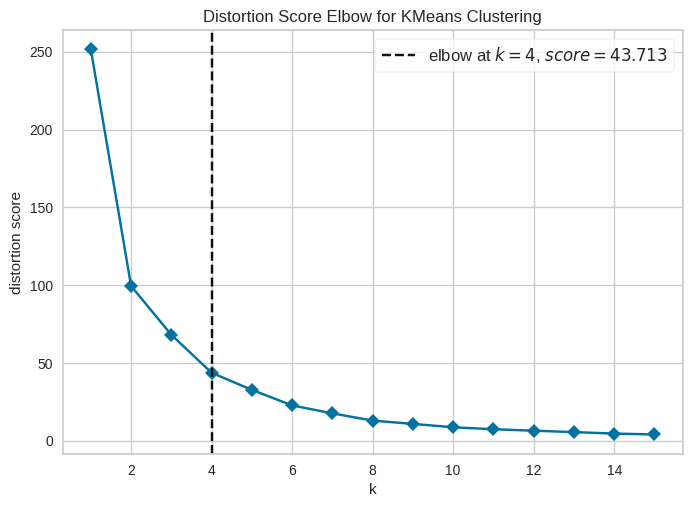

In [167]:
from yellowbrick.cluster import KElbowVisualizer

# https://builtin.com/data-science/elbow-method
# Instantiate the clustering model and visualizer
km_clf = KMeans(n_init = 10,random_state=42)
visualizer = KElbowVisualizer(km_clf, k=(1,16), metric='distortion', timings=False)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();        # Finalize and render the figure

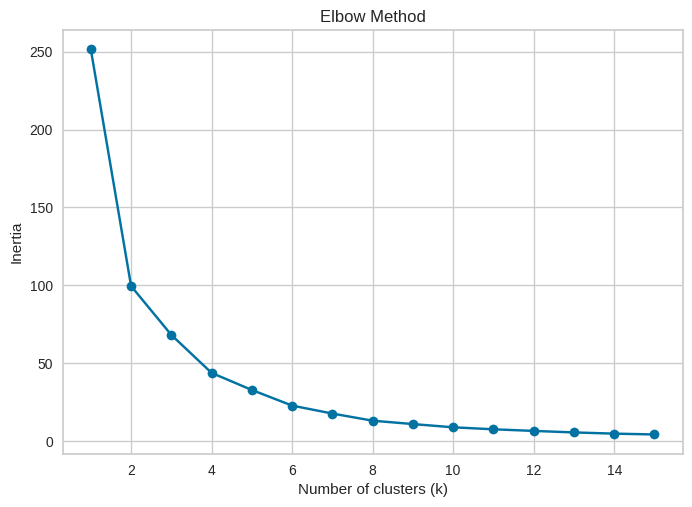

In [168]:
k_range = range(1, 16)

# store inertia values
inertia = []

# Calculate inertia for each k
for k in k_range:
    kmeans = KMeans(n_init = 10, n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(range(2, 16, 2))
plt.grid(True)
plt.show()

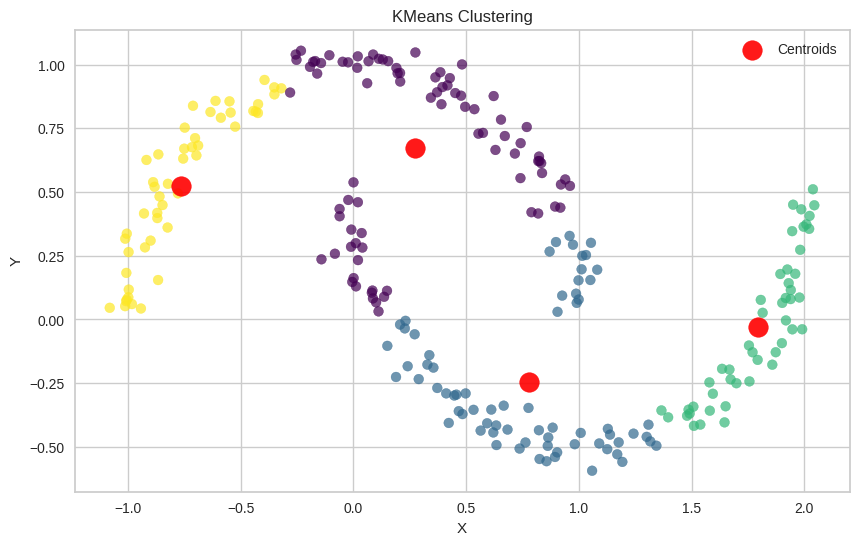

In [169]:
def plot_kmeans_clusters(x, y, k=2):
    """
    Plot the results of KMeans clustering.

    Parameters:
    - x: array-like, shape (n_samples,)
        The x-coordinates of the data points.
    - y: array-like, shape (n_samples,)
        The y-coordinates of the data points.
    - k: int, optional (default=2)
        The number of clusters for KMeans clustering.

    Returns:
    None
    """
    # Combine data points into a feature matrix
    X = np.column_stack((x, y))

    # Run KMeans with the specified number of clusters
    kmeans = KMeans(n_init = 10,n_clusters=k, random_state=0)
    kmeans.fit(X)

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, c=kmeans.labels_, cmap='viridis', s=50, alpha=0.7)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='o', s=200, alpha=0.9, label='Centroids')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('KMeans Clustering')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_kmeans_clusters(X[:, 0], X[:, 1], 4)

## Question 4

- Try DBSCAN algorithm on the same data with the appropriate `eps` parameter value
- Scatter plot the results and color the clusters

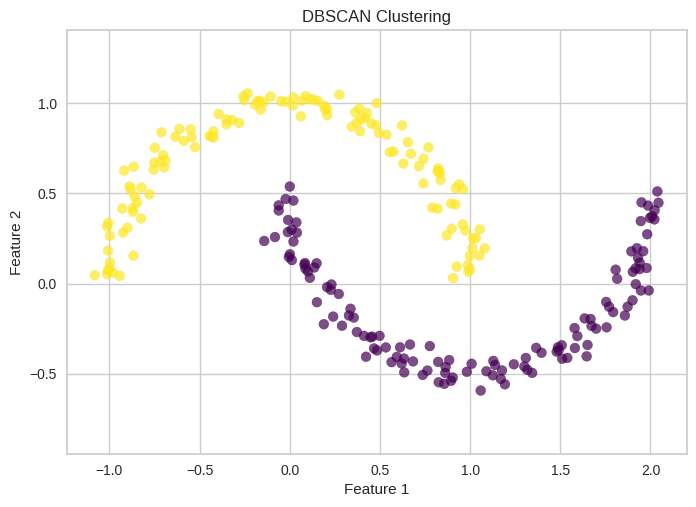

In [170]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)


plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='viridis', s=50, alpha=0.7)
plt.axis('equal')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.grid(True)
plt.show()

## Question 5
**Compare between DBSCAN and kmeans results on the same data. Why do you think you got those results??**

**ANSWER:**

The DBSCAN has clustered the data points into 2 clusters, which is true while K-Means has clustered the data points into 4 clusters. the reason is that the data is wrapped around each other, i.e `nested clusters`. the K-Means can't handle this type of data.

## Question 6
For the following dataset
1. Run kmeans algorithm clustering using k=2.
3. Plot results of algorithm showing the color of the clusters

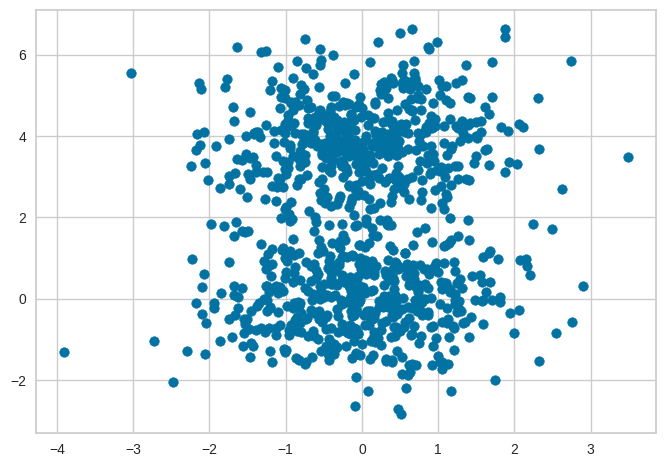

In [171]:
np.random.seed(100)
rng = np.random.default_rng()
x = rng.standard_normal(1000)
y = np.concatenate([rng.standard_normal(500)+4, rng.standard_normal(500)])
plt.scatter(x,y);

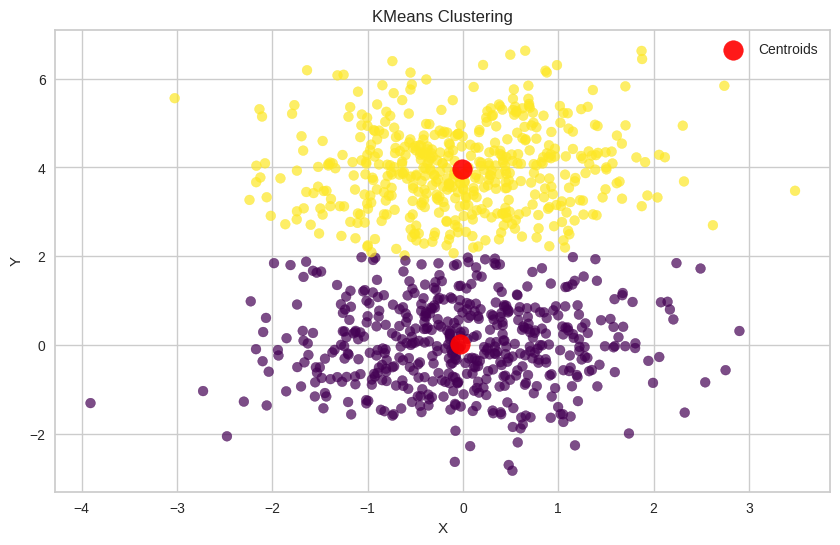

In [172]:
plot_kmeans_clusters(x, y, k=2)

## Question 7
For the following dataset
1. Run kmeans algorithm clustering using k=2.
3. Plot results of algorithm showing the color of the clusters

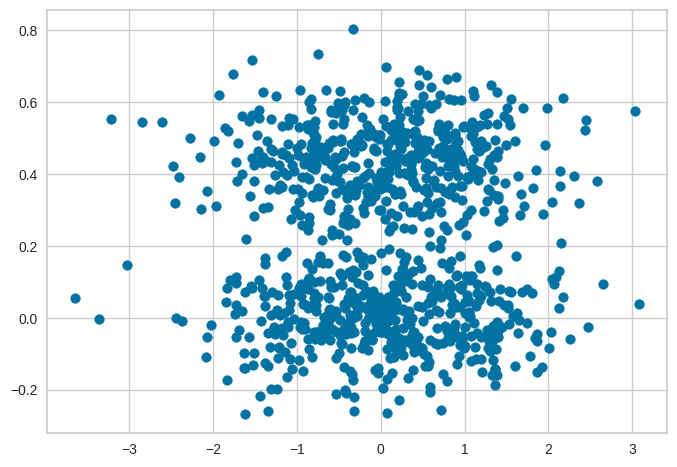

In [173]:
np.random.seed(100)
rng = np.random.default_rng()
x = rng.standard_normal(1000)
y = np.concatenate([rng.standard_normal(500) + 4.5, rng.standard_normal(500)]) / 10
plt.scatter(x,y);

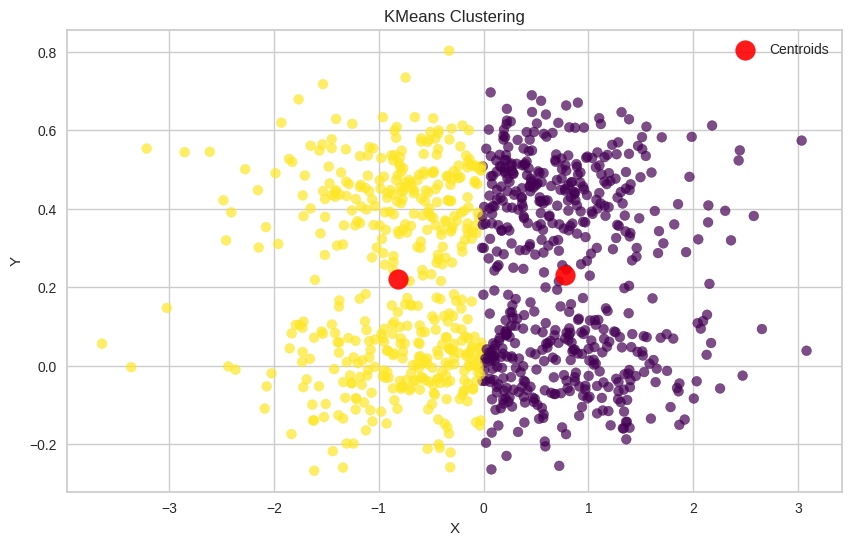

In [174]:
plot_kmeans_clusters(x, y, k=2)

## Question 8
Why did kmeans fail to cluster the data in question 7 but succeeded in question 6?

**ANSWER**:

In question 6, the clusters are more distinct, making it easier for KMeans to identify them. In question 7, the clusters are closer together, which leads to potential overlap and difficulty in defining clear cluster boundaries. `due to small range of y axis, i.e. small standard deviation of data in question 7`



## Question 9

- Find a way to make kmeans succeed on the data and plot the results

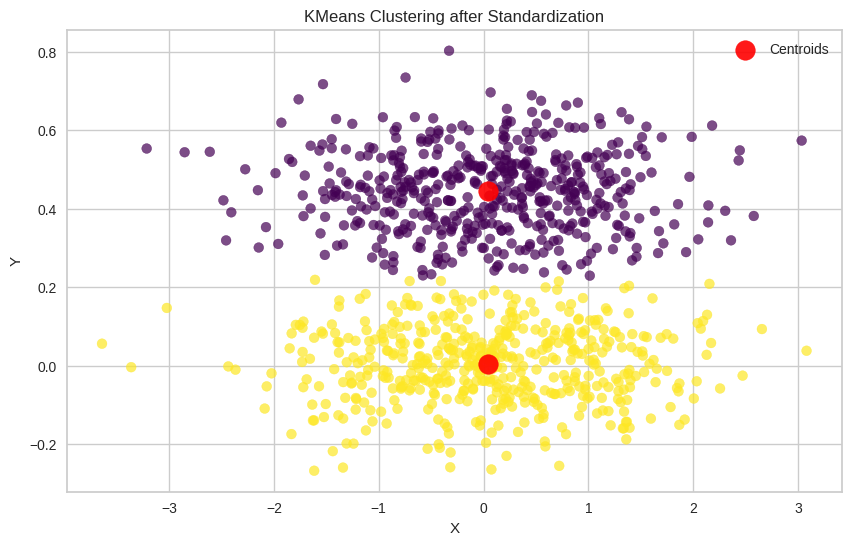

In [175]:
from sklearn.preprocessing import StandardScaler

X = np.column_stack((x, y))

# Standardize the feature matrix
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

kmeans = KMeans(n_init=10, n_clusters=2, random_state=0)
kmeans.fit(X_standardized)

# Reverse standardization to obtain original data
centroids_standardized = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_standardized)

# Plot results with original data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=kmeans.labels_, cmap='viridis', s=50, alpha=0.7)
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], c='red', marker='o', s=200, alpha=0.9, label='Centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('KMeans Clustering after Standardization')
plt.legend()
plt.grid(True)
plt.show()

## Question 10
For the following dataset
1. Run kmeans algorithm clustering using k=2.
3. Plot results of algorithm showing the color of the clusters

In [176]:
def create_dataset(plot_original = False):
    np.random.seed(100)
    x = np.random.normal(0, 1, 500)
    y = np.random.normal(0, 1, 500)
    X_1 = np.vstack((x, y)).T

    x = np.random.normal(6, 1, 500)
    X_2 = np.vstack((x, y)).T

    X = np.vstack((X_1, X_2))
    if plot_original:
        plt.scatter(X[:, 0], X[:, 1])
        plt.title('Generated Data')
        plt.axis('equal');
    # Scaling matrix
    sx, sy = 0.7, 3.4
    Scale = np.array([[sx, 0], [0, sy]])

    # Rotation matrix
    theta = 0.77*np.pi
    c, s = np.cos(theta), np.sin(theta)
    Rot = np.array([[c, -s], [s, c]])

    # Transformation matrix
    T = Scale.dot(Rot)
    X_t = X - np.array([3,0])
    X_t = X_t.dot(T)
    return X_t

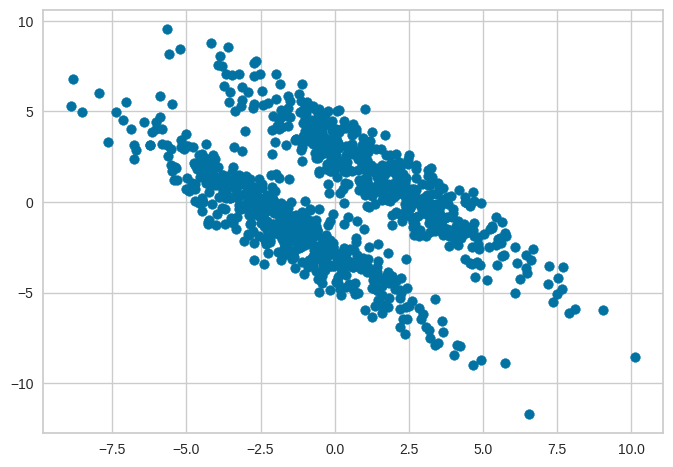

In [177]:
X = create_dataset()
plt.scatter(X[:,0],X[:,1]);

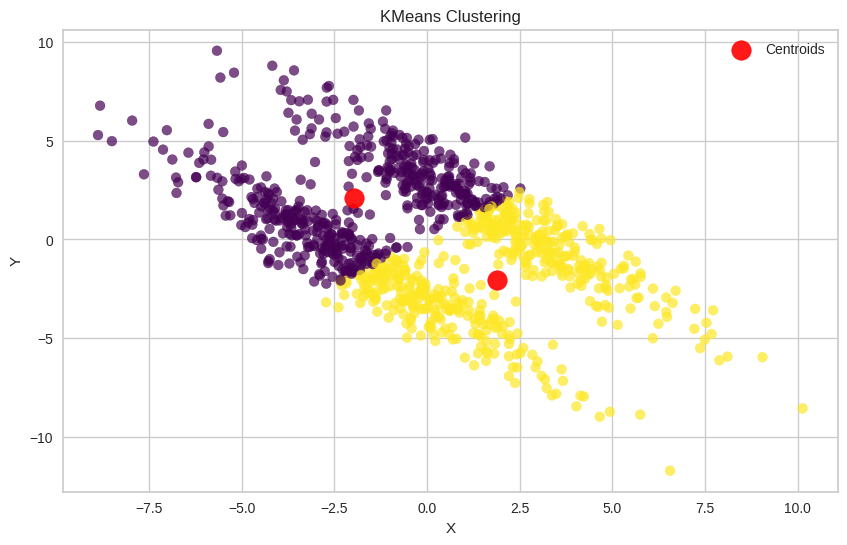

In [178]:
plot_kmeans_clusters(X[:,0],X[:,1], k=2)

## Question 11
Why did kmeans fail to cluster the data in question 10 but succeeded in question 6?

**ANSWER**:

Because the data in question 11 isn't in spherical shape. K-means tends to work well for spherical clusters, where the data points are clustered tightly around a central point `uses Euclidean Distance`. On the other hand, data of question 6 tends to be more spherical.


## Question 12

1. Read the following blog -[link](https://janakiev.com/blog/covariance-matrix/#:~:text=Linear%20Transformations%20of%20the%20Data%20Set,-Next%20we%20will&text=which%20means%20that%20we%20can,transformed%20by%20Y%3DSX)-
2. Calculate a transformation that you can apply to the data to make kmeans succeed !!!
3. Plot the transformed data
4. Plot the kmeans result on the **ORIGINAL** data


In [179]:
def transform_to_spherical(data):
    """
    Apply whitening transformation to convert elliptical data into spherical data.

    Parameters:
    - data: array-like, shape (n_samples, n_features)
        The input data matrix.

    Returns:
    - spherical_data: array-like, shape (n_samples, n_features)
        The transformed spherical data matrix.
    """
    # Center the data
    centered_data = data - np.mean(data, axis=0)

    # Calculate covariance matrix
    covariance_matrix = np.cov(centered_data, rowvar=False)

    # Compute eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Construct transformation matrix
    transformation_matrix = np.dot(np.dot(eigenvectors, np.diag(1 / np.sqrt(eigenvalues))), eigenvectors.T)

    # Apply transformation to data
    spherical_data = np.dot(centered_data, transformation_matrix)

    return spherical_data, transformation_matrix

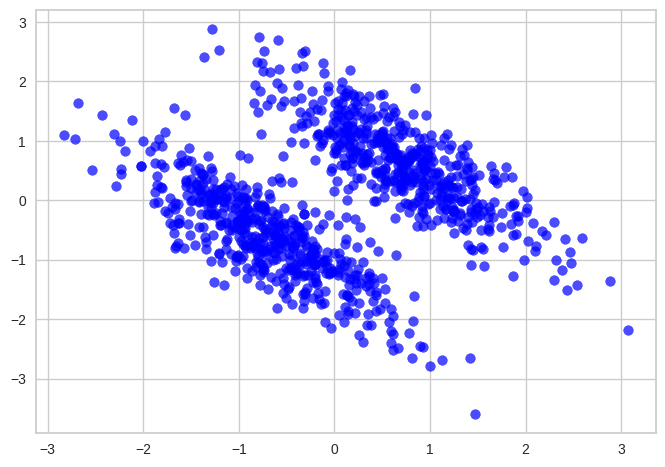

In [180]:
transformed_data, transformation_matrix = transform_to_spherical(X)

plt.scatter(transformed_data[:,0],transformed_data[:,1], color='blue', alpha=0.7);

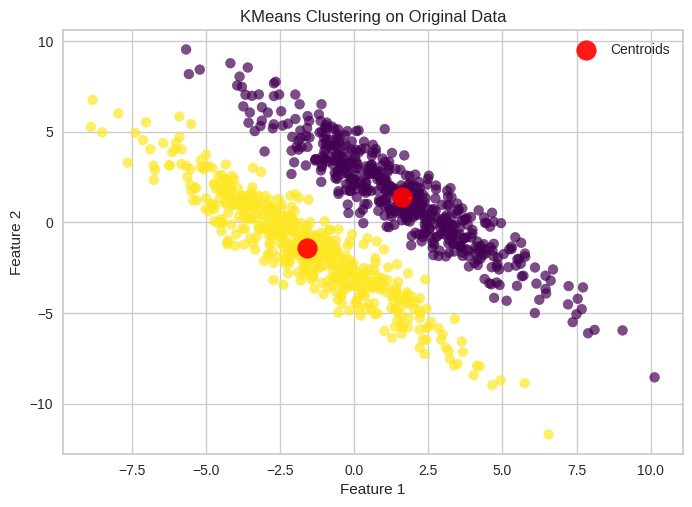

In [181]:
kmeans = KMeans(n_init=10,n_clusters=2, random_state=42)
kmeans.fit(transformed_data)
labels = kmeans.labels_

centers = np.dot(kmeans.cluster_centers_, np.linalg.pinv(transformation_matrix))

# Plot KMeans clustering result on original data
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='o', s=200, alpha=0.9, label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering on Original Data')
plt.legend()
plt.grid(True)
plt.show();

# Part 2 PCA

In [182]:
from matplotlib.colors import ListedColormap

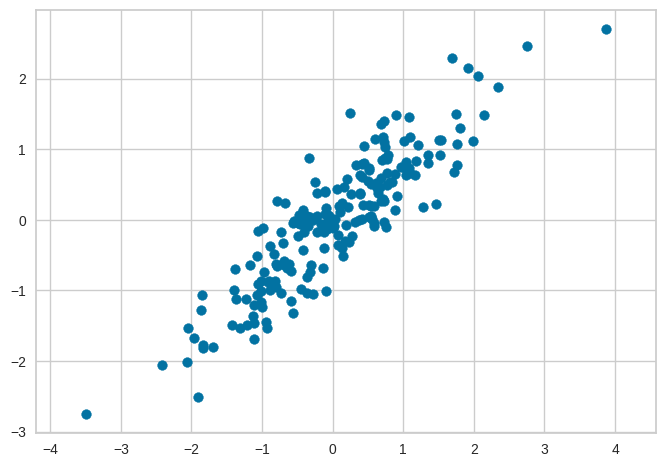

In [183]:
rng = np.random.RandomState(42)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

## Question 1

Write your own PCA function that will return:
* The sorted eigenvectors of all principal components
* The corresponding eigenvalues
* The transformed data
- Function takes in the data only
    - You can use np.linalg.eig

Note, please make sure that the data is centered before transformation (i.e., the sample
mean subtracted out) but not normalized.

In [184]:
#### YOUR FUNCTION
def pca(X):
    # Center the data by subtracting the mean of each feature
    X_centered = X - np.mean(X, axis=0)

    # Calculate the covariance matrix
    cov_matrix = np.cov(X_centered, rowvar=False)

    # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Project the centered data onto the principal components
    X_reduced = np.dot(X_centered, sorted_eigenvectors)

    return sorted_eigenvectors, sorted_eigenvalues, X_reduced

## Question 2
- Apply your PCA function to the data given above
- print the pca eigenvalues
- plot the transformed data
- plot the PCA eigenvectors over the ORIGINAL data with the correct directions!

In [185]:
## Apply your function
sorted_eigenvectors, sorted_eigenvalue, X_transformed = pca(X)

In [186]:
print("Eigenvalues are: ",sorted_eigenvalue )

Eigenvalues are:  [1.82927343 0.10246373]


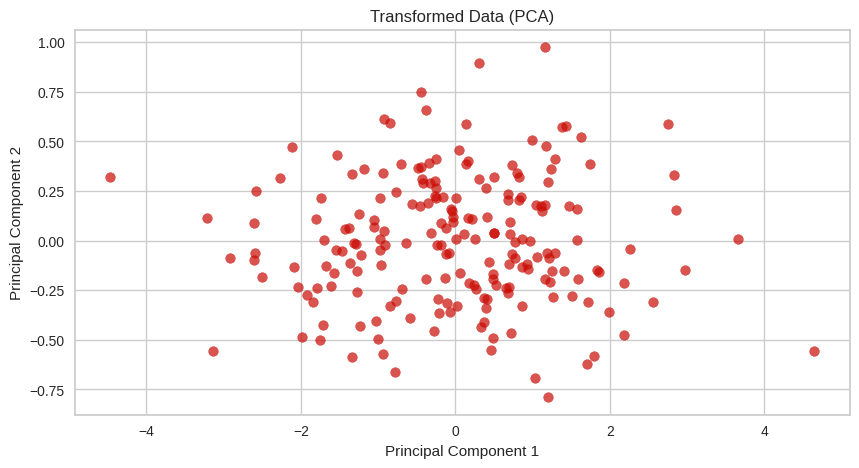

In [187]:
# Plot transformed data
plt.figure(figsize=(10, 5))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], color='r', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Transformed Data (PCA)')
plt.grid(True)
plt.show()

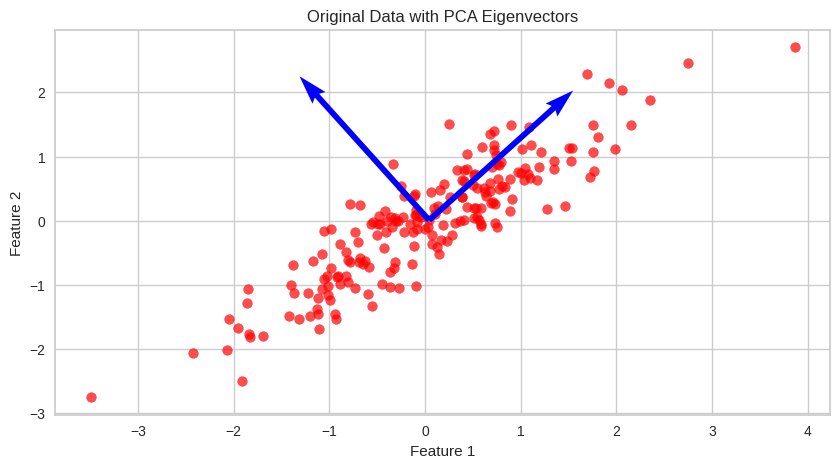

In [188]:
# Plot original data
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], color='red', alpha=0.7)

# Plot eigenvectors
origin = np.mean(X, axis=0)
for eigenvec in sorted_eigenvectors.T:
    plt.quiver(*origin, *eigenvec, color='blue', scale=4)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data with PCA Eigenvectors')
plt.grid(True)
plt.show()

## Question 3

- Apply sklearn's PCA function to the same data
- print the pca eigenvalues

In [190]:
from sklearn.decomposition import PCA

# Apply PCA using scikit-learn
pca = PCA()
X_pca = pca.fit_transform(X)

print("PCA Eigenvalues:", pca.explained_variance_)

PCA Eigenvalues: [1.82927343 0.10246373]
